In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
plt.style.use("seaborn") # If not compiling, remove this line.

# Analyzing distribution 

For this task I chose [arcsine distribution](https://en.wikipedia.org/wiki/Arcsine_distribution).

$$f(x) = \dfrac{1}{\pi\sqrt{x(1-x)}}$$

Mean: $\dfrac{1}{2}$

Variance: $\dfrac{1}{8}$

In [2]:
# Initializing mean and variance constants.
mean = 1/2
variance = 1/8

In [3]:
# Initializing distribution.
arcsine = sts.arcsine()

# Taking 1000 random values from distribution.
sample = arcsine.rvs(1000)

/home/furiousteabag/programms/envs/env/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:390: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


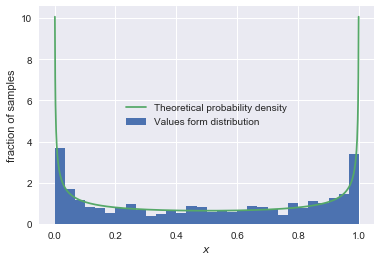

In [4]:
# Plotting histogramm of our 1000 values.
plt.hist(sample, bins=30, density=True, label="Values form distribution")

# Plotting theoretical probability density function.
x = np.linspace(arcsine.ppf(0), arcsine.ppf(1), 1000)
y = arcsine.pdf(x)
plt.plot(x, y, label="Theoretical probability density")

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='center')

plt.show()

# Estimating mean value distribution 

For each $n$ generating 1000 samples with sizes $n$. 

As I have mean and variance as constants, I just have to divide variance by $n$.

$\bar{p_n} \approx \sim N(\mathbb{E}X, \dfrac{\mathbb{D}X}{n}) = N(\dfrac{1}{2}, \dfrac{\dfrac{1}{8}}{n}) $ 

In [5]:
# Number of values in each sample.
n = [5, 10, 50, 100]

# List with size 1000 of means of n-sized sample list.
means = [[np.mean(arcsine.rvs(n_local)) for i in range(1000)] for n_local in n]

# Normal distributions for each n.
norms = [sts.norm(mean, np.sqrt(variance/n_local)) for n_local in n]

Building histogramms of samples distributions and normal distribution above them.

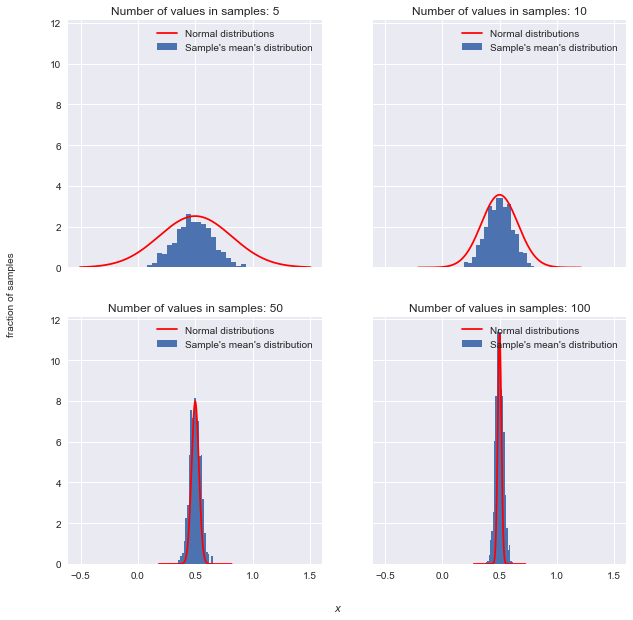

In [6]:
# Initial data.
nrows = 2
ncols = 2
figsize = (10, 10)
bins = 20

# Initializing plots.
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex='all', sharey='all', figsize=figsize)

# Iterating throw each subplot and drawing histogram on every
# distribution and normal distribution above it.
for number, axe in enumerate(axes.reshape(-1)):
    axe.hist(means[number], bins=bins, density=True, label="Sample's mean's distribution")
    axe.plot(np.linspace(norms[number].ppf(1e-10), norms[number].ppf(1-1e-10), 1000), norms[number].pdf(x), 'r', label="Normal distributions")
    axe.set_title("Number of values in samples: {}".format(n[number]))
    axe.legend(loc="upper right")
    
# Drawing xtitle and ytitle.
fig.text(0.5, 0.06, '$x$', ha='center')
fig.text(0.04, 0.5, 'fraction of samples', va='center', rotation='vertical')

plt.show()

# Conclusion 

The difference between received normal distributions is in approximation of means dispertions accuracy: it rises as $n$ rises.